In [59]:
import numpy as np
from scipy.optimize import curve_fit
import scipy.constants as const
from scipy.stats import norm
import pandas as pd
import matplotlib.pyplot as plt 

In [114]:
def gaussian_test(x, amp0, mu0, sigma0):
    return amp0*np.exp(((x-mu0)/sigma0)**2 /(-2))/((2*np.pi)**(0.5)*sigma0)

In [189]:
def hist_fit(data = len_air_400[4:], bins=20, data_label = 'Air, 400 V'):
    
    plt.figure(figsize=(10,6), dpi = 200)
    
    counts, bins, _ = plt.hist(data, bins, density=False, color='w',edgecolor='b', label=data_label)
    
    # Calculate the bin width
    bin_width = bins[1] - bins[0]

    # Calculate the bin centers
    bin_centers = bins[:-1] + bin_width / 2

    # Calculate the error bars as the square root of the bin counts
    errors = np.sqrt(counts)

    # Plot the histogram with error bars
    plt.errorbar(bin_centers, counts, yerr=errors, fmt='bo', markersize=4, capsize=2)

    popt, pcov = curve_fit(gaussian_test, bin_centers, counts)#, \
                           # p0=[amplitude, mean, sdeviation], maxfev=100000)
    fit_x = np.arange(bins[0]-bin_width/4, bins[-1]+bin_width/2, bin_width/4)
    plt.plot(fit_x,gaussian_test(fit_x, *popt), 'r', label = 'Gaussian Fit')
    
    plt.tick_params(bottom=True,top=True,left=True,right=True,direction='in')
    plt.xlabel('Trajectory Length [cm]', fontsize=12)
    plt.ylabel('Trajectory Counts',fontsize=12)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.legend()
    return popt

array([22.36358584,  2.82455791,  0.89085912])

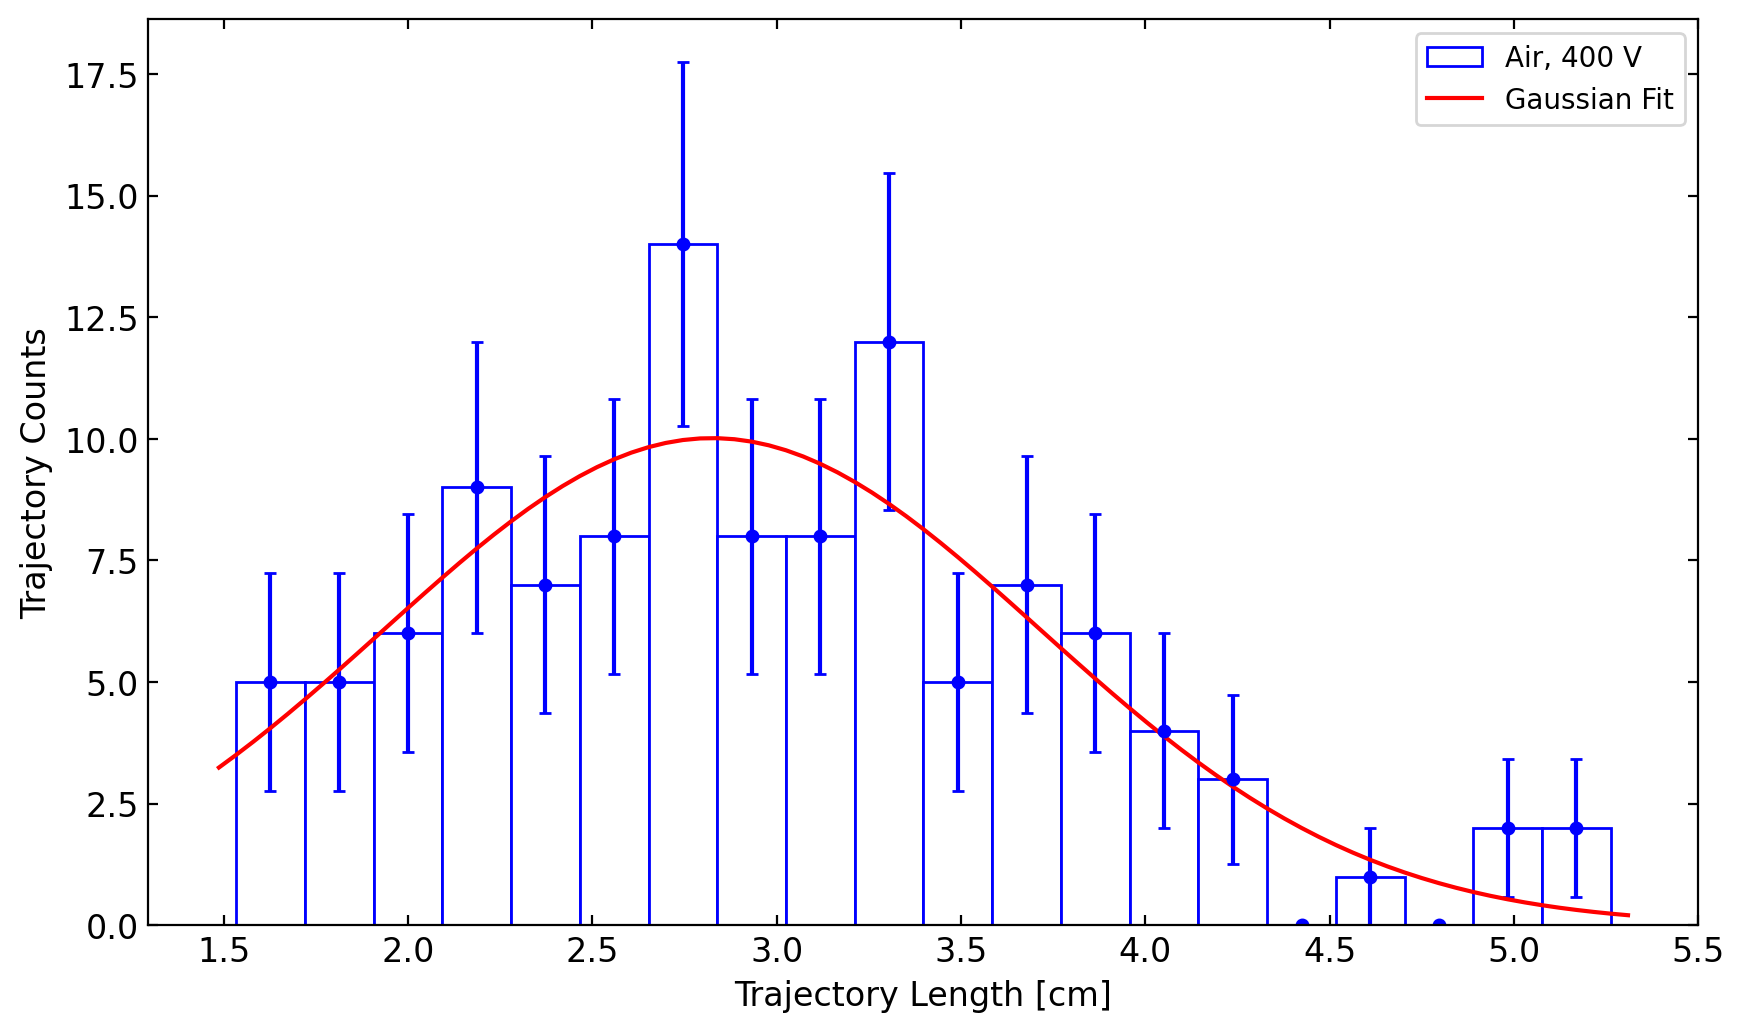

In [190]:

data_air_400 = pd.read_csv('day2_data/air_volt_400.csv')

len_air_400 = data_air_400['Length'].tolist()

hist_fit(data=len_air_400[4:])


array([14.79770164,  2.98406432,  0.77880922])

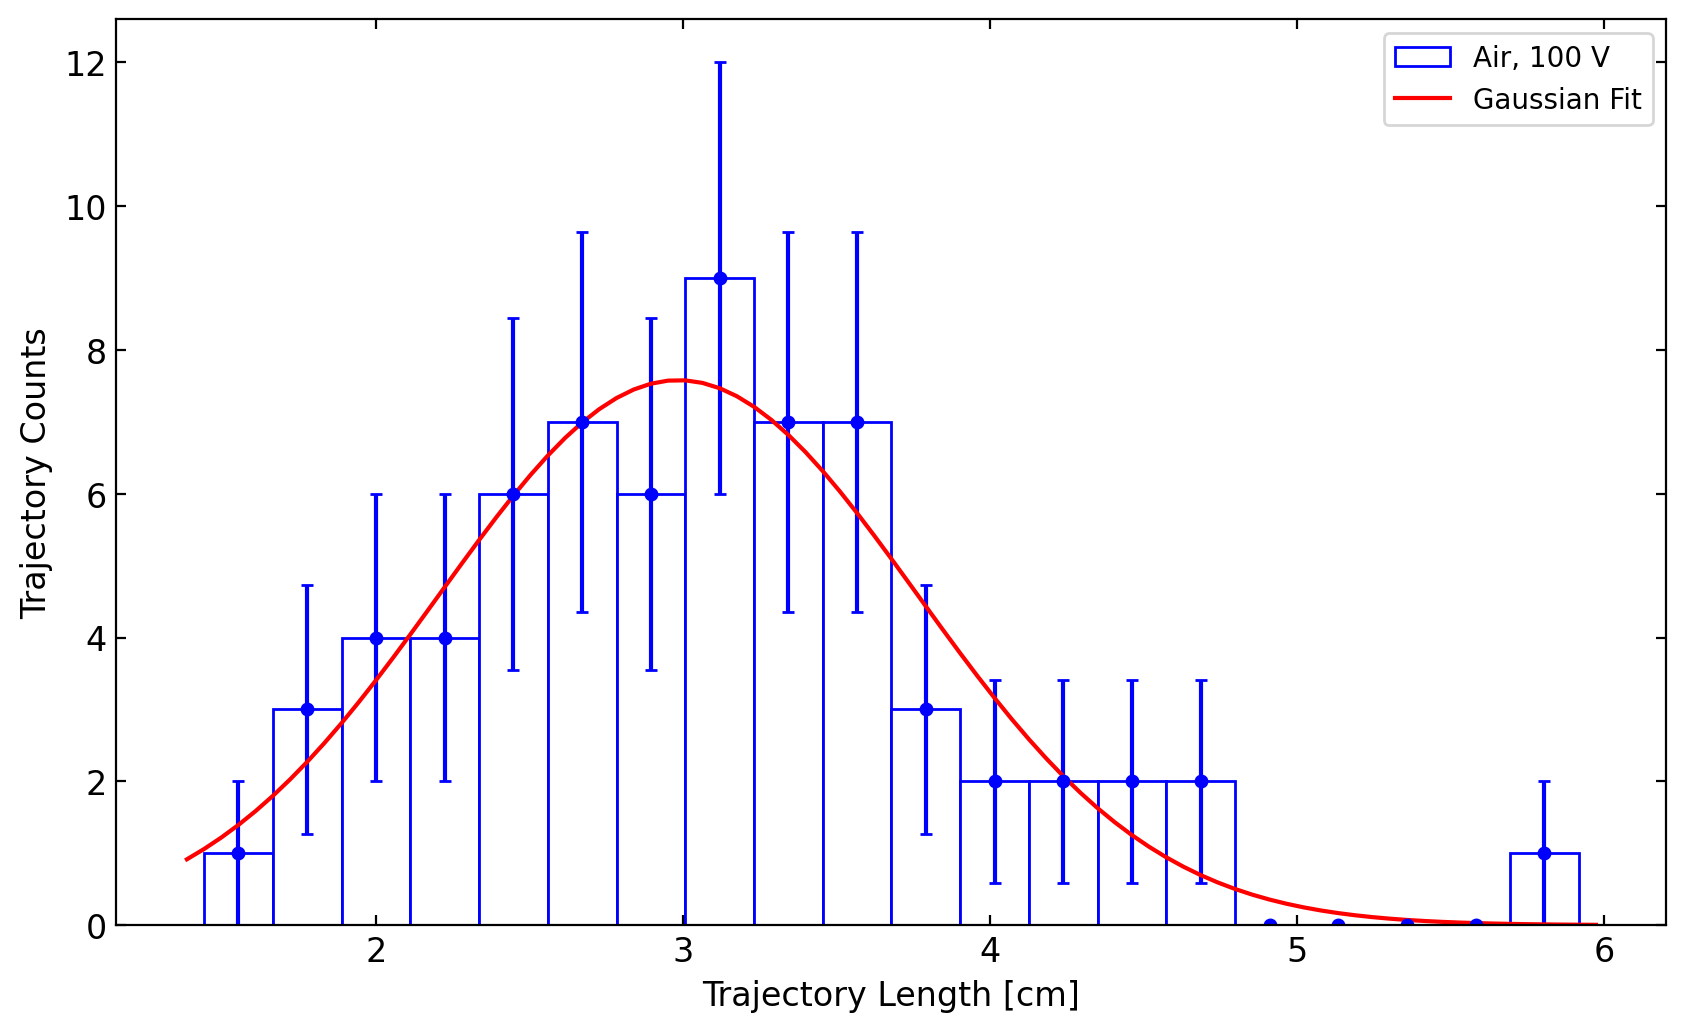

In [191]:

data_air_100 = pd.read_csv('day2_data/air_volt_100.csv')

len_air_100 = data_air_100['Length'].tolist()

hist_fit(data=len_air_100[1:], data_label = 'Air, 100 V')


array([2.52057812, 2.3476939 , 0.50341561])

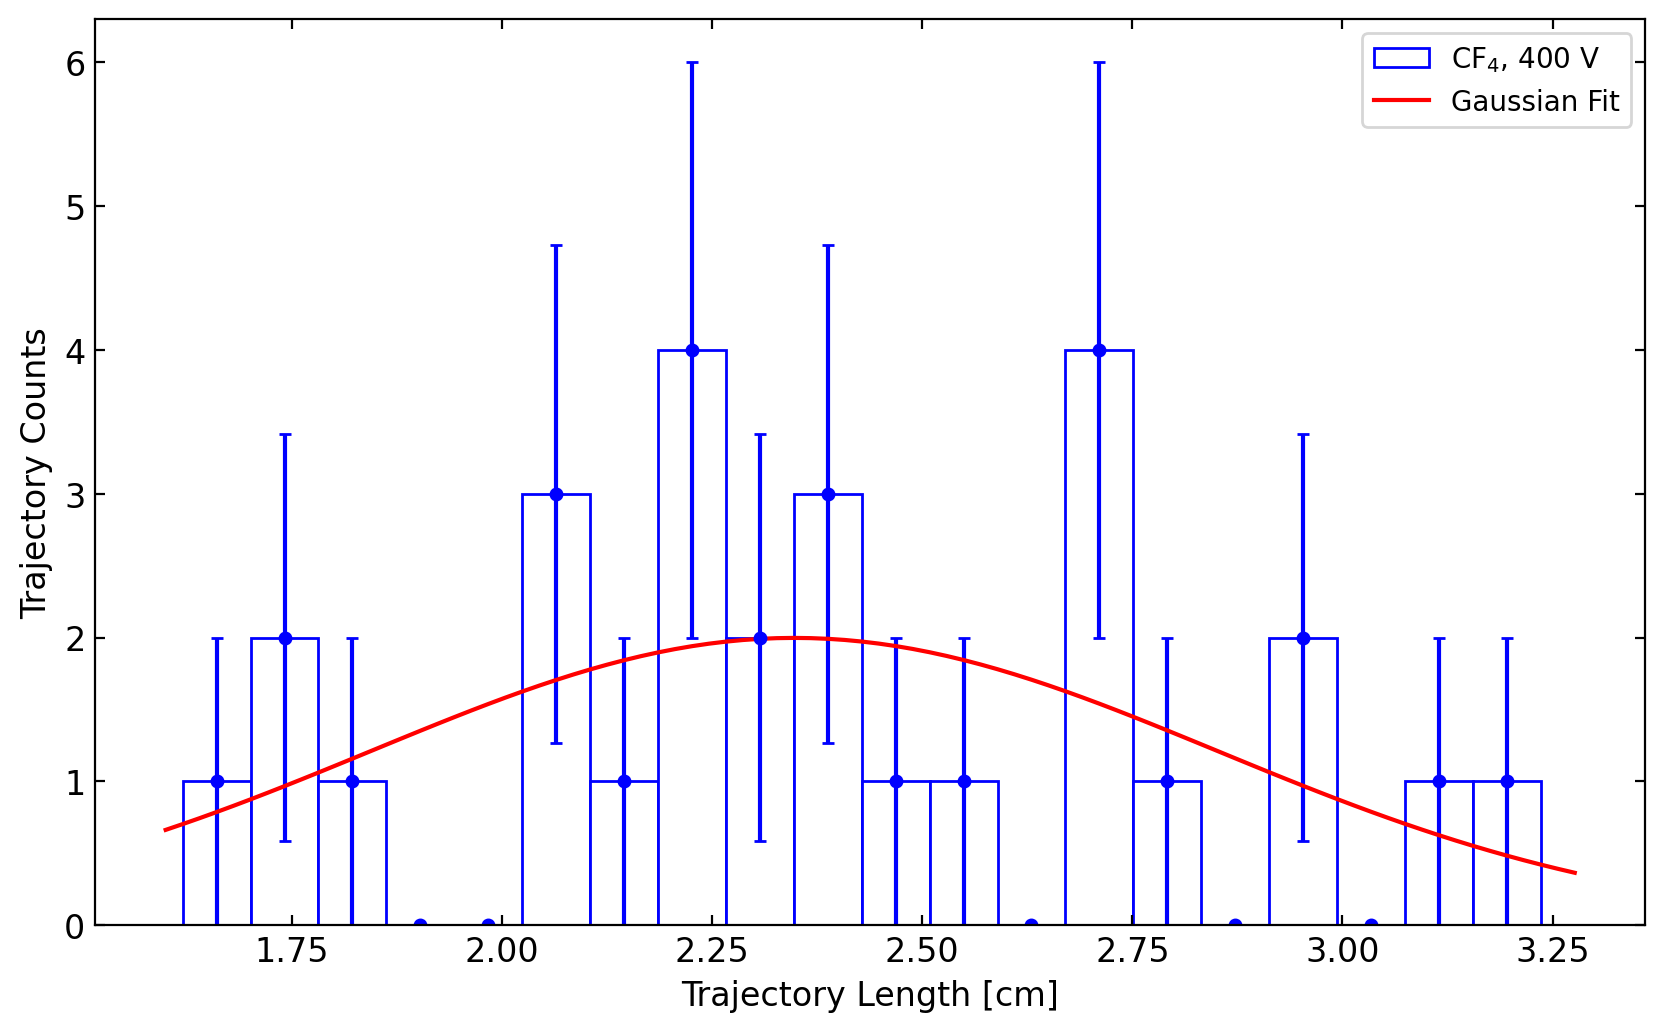

In [192]:

data_he_400 = pd.read_csv('day2_data/he_volt_400.csv')

len_he_400 = data_he_400['Length'].tolist()

hist_fit(data=len_he_400, data_label = 'CF$_4$, 400 V')


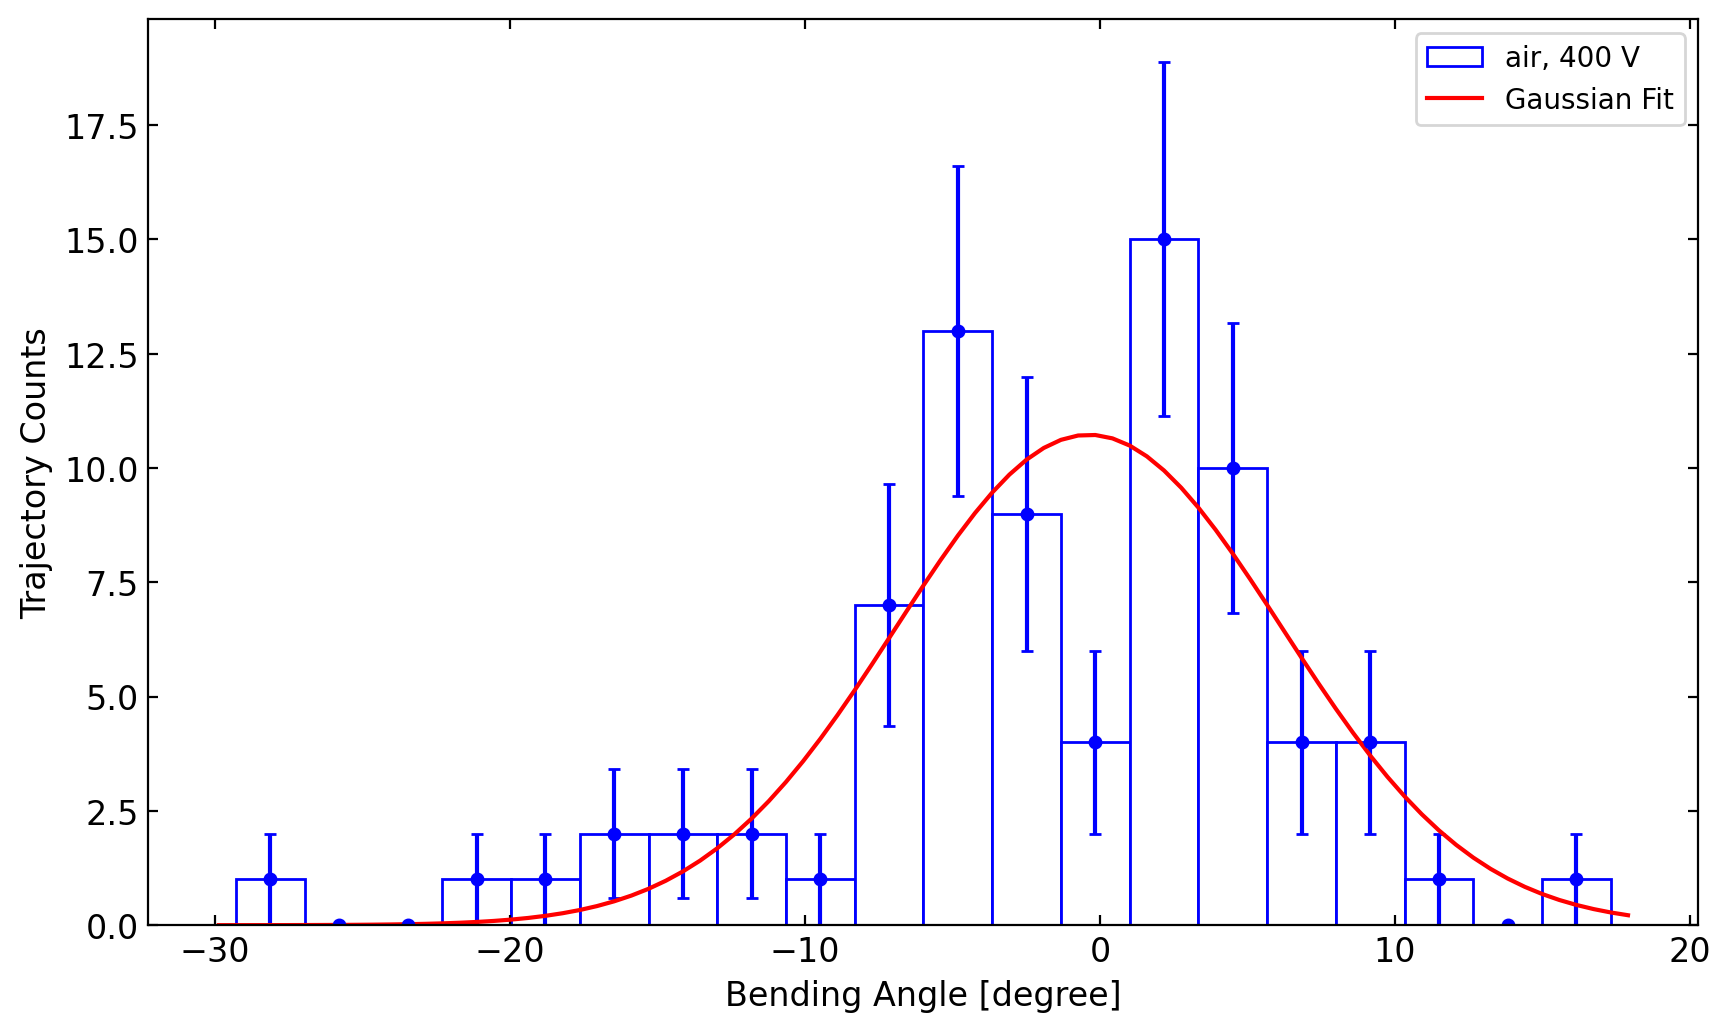

[176.00352272  -0.37581515   6.54560532]


In [216]:
data_ms_air_400 = pd.read_csv('day2_data/mult_scat_air_400_3.csv')

len_ms_air_400 = data_ms_air_400['Angle'].tolist()
data=len_ms_air_400
data_label = 'air, 400 V'
plt.figure(figsize=(10,6), dpi = 200)
    
counts, bins, _ = plt.hist(data, bins=20, density=False, color='w',edgecolor='b', label=data_label)

# Calculate the bin width
bin_width = bins[1] - bins[0]

# Calculate the bin centers
bin_centers = bins[:-1] + bin_width / 2

# Calculate the error bars as the square root of the bin counts
errors = np.sqrt(counts)

# Plot the histogram with error bars
plt.errorbar(bin_centers, counts, yerr=errors, fmt='bo', markersize=4, capsize=2)

popt, pcov = curve_fit(gaussian_test, bin_centers, counts)#, \
                       # p0=[amplitude, mean, sdeviation], maxfev=100000)
fit_x = np.arange(bins[0]-bin_width/4, bins[-1]+bin_width/2, bin_width/4)
plt.plot(fit_x,gaussian_test(fit_x, *popt), 'r', label = 'Gaussian Fit')

plt.tick_params(bottom=True,top=True,left=True,right=True,direction='in')
plt.xlabel('Bending Angle [degree]', fontsize=12)
plt.ylabel('Trajectory Counts',fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend()
plt.show()
print(popt)